In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./data/sample_26000_full_cleansed_anonymized.csv")
df

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
0,1534262899,c7f3d022e57d46ec78d1626a016ecb9281fbe2b2,PC,Other$Other,4523dfed2d55afbd76286861e0b764e08d4695f7,Windows,10,Firefox,DE-BY-POS,92353
1,1534265100,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,313f8be041b0a4b47127bdc099ffcb9fbe40aca9,Windows,7,Chrome,DE-ST-MAG,39126
2,1534265100,7ea941558d60dd9025cf9ff65cc4b07a1e586f21,ConnectedTV,Samsung$Other,8169f04e199ced559079f5612b2bd91304bc3e73,Other,Other,Other,DE-NW-GEB,58285
3,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
4,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
...,...,...,...,...,...,...,...,...,...,...
26259,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26260,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26261,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26262,1534265999,75e01f11cd4650d8e2221663b18260451e4de6ef,Phone,Samsung$Galaxy,08269cdd472d182bee91485bb998f1618080c9f5,Android,4,Chrome,DE-BE-BER,14193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   event_time    26264 non-null  int64 
 1   user_uuid     26264 non-null  object
 2   devicegroup   26264 non-null  object
 3   device        26264 non-null  object
 4   ip_address    26264 non-null  object
 5   os_family     26264 non-null  object
 6   os_name       26264 non-null  object
 7   browser_name  26264 non-null  object
 8   locode        26264 non-null  object
 9   postal_code   25136 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [4]:
df.describe()

,event_time
count,2.626400e+04
mean,1.534265e+09
std,4.719512e+02
min,1.534263e+09
25%,1.534265e+09
50%,1.534265e+09
75%,1.534266e+09
max,1.534266e+09


# Duplicates

In [5]:
df = df.drop_duplicates(keep='first')

# Missing data

In [6]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

,N_Missing [-],Percentage [%]
event_time,0,0.0
user_uuid,0,0.0
devicegroup,0,0.0
device,0,0.0
ip_address,0,0.0
os_family,0,0.0
os_name,0,0.0
browser_name,0,0.0
locode,0,0.0
postal_code,724,5.0


#### Drop the 5% of rows with missing Postal Code

In [7]:
df = df.dropna(how='any')

# Inspect the columns

#### Event Time

<AxesSubplot: xlabel='event_time', ylabel='Count'>

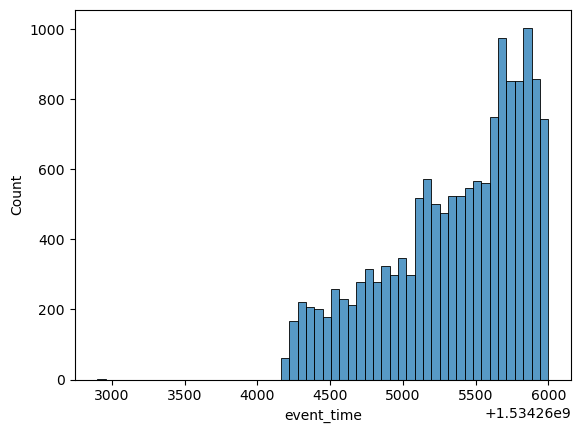

In [8]:
sns.histplot(df.event_time)

### Rows for a particular timestamp

In [9]:
df.event_time.value_counts()

1534265795    28
1534265672    28
1534265676    27
1534265697    27
1534265858    27
              ..
1534264480     1
1534264482     1
1534264485     1
1534264486     1
1534262899     1
Name: event_time, Length: 1783, dtype: int64

In [10]:
df.event_time.sort_values(ascending=True)

0        1534262899
12735    1534264200
12732    1534264200
12739    1534264201
12742    1534264201
            ...    
6403     1534265999
26254    1534265999
26255    1534265999
26258    1534265999
26262    1534265999
Name: event_time, Length: 14698, dtype: int64

#### User UU ID
Unique identifier (cookie_id) of device. Can be reset by user and will be given anew upon next request

In [11]:
df.user_uuid.value_counts()

b602d594afd2b0b327e07a06f36ca6a7e42546d0    3638
ea48b29e05da74493d397da3ac7533708e8790fd     104
174040068c20ff3e16f0f6a16dd36371f2a87d1d      22
5aedcb83537404da8cf8997bfcdbf1ab789606c1       7
dbe532627eefa16fc7b487615f4555537bc5058b       6
                                            ... 
282d336b0bdcbb7e7bde119fa531af3eace39c98       1
cedc342956326c76f53089f1739f516f429617e4       1
8017beb7c327693b47e5f4c0c240923c6f6089bb       1
9f059beea9ebc9dbcb3ab222225dcd6d46d95dc2       1
2c46e42d1679d27e8bac310f0e82f51f4d68deb0       1
Name: user_uuid, Length: 10594, dtype: int64

#### Device group

In [12]:
df.devicegroup.value_counts()

PC                 5139
ConnectedTV        4580
Phone              4034
Tablet              889
ConnectedDevice      38
SetTopBox            18
Name: devicegroup, dtype: int64

#### Device

In [13]:
df.device.value_counts()

Other$Other         5699
Samsung$Other       3357
Apple$iPhone        1169
Apple$iPad           841
Apple$Other          782
Panasonic$Other      722
LG$Other             531
Sony$Other           475
Philips$Other        280
Telefunken$Other     136
Huawei$Other         122
Samsung$Galaxy        81
Technisat$Other       65
Loewe$Other           59
Aldi$Other            56
Motorola$Moto         49
Toshiba$Other         46
HTC$Other             44
Amazon$Kindle         37
Hisense$Other         36
Lenovo$Other          33
ZTE$Other             19
Microsoft$Xbox        15
Other$Nexus            7
Microsoft$Lumia        6
Vodafone$Other         5
RIM$Other              5
JVC$Other              5
Nokia$Other            3
Asus$Other             3
Kendo$Other            3
Sony$PlayStation       2
Nokia$Lumia            2
HP$Other               1
Apple$iPod             1
Nintendo$Wii           1
Name: device, dtype: int64

#### IP Address
Hash of ip address of device (hashed because of privacy reasons)

In [14]:
df.ip_address.value_counts()

bf96134a2a35c14daf084af58efebb0f09854ebb    15
e897fcc02df496db4a033ce1b792d631dc9f9ef7    11
4ec89b1190cda1c4088f6ccd8aaadd5aa287b7f7     8
b174258bb37b69c7fb427195b3f8c9dd9255af27     7
7a70ac711609e52ab12f64ce03a877a8d2e4b947     7
                                            ..
6d751a97e9497b5eb0ca7d2b15451a697b56d97e     1
947f569fe259e3300ae1d1e0e26ec8641d0d9fc7     1
54587e1ed205efaf0933f1b72446220b496e34ce     1
f9650fb82e7f3c029fc884851e6dd0da422e6deb     1
92dc8cc1cc07e831af0734eba1af6150968410d3     1
Name: ip_address, Length: 13775, dtype: int64

#### OS Family

In [15]:
df.os_family.value_counts()

Windows     4198
Android     2929
Other       2729
iOS         2016
Linux       1842
macOS        777
WebOS        202
ChromeOs       5
Name: os_family, dtype: int64

#### OS name

In [16]:
df.os_name.value_counts()

Other        5036
10           2744
7            2081
11           1580
8            1442
10.13         453
5             423
6             386
4             154
10.11         123
9              98
10.12          95
10.10          61
12              7
10 Mobile       5
Phone 8         5
10.14           5
Name: os_name, dtype: int64

#### Browser name

In [17]:
df.browser_name.value_counts()

Chrome     4631
Other      3315
Safari     2467
Firefox    2162
Opera      1325
Edge        488
MSIE        295
Vivaldi      15
Name: browser_name, dtype: int64

#### Locode

In [18]:
df.locode.value_counts()

DE-BE-BER    857
DE-HH-HAM    681
DE-BY-MUC    478
DE-NW-CGN    378
DE-HE-FRA    309
            ... 
LT-16-KUN      1
DE-RP-WYH      1
DE-BY-ATP      1
DE-BY-FDP      1
DK-82-LVG      1
Name: locode, Length: 2535, dtype: int64

#### Postal code

In [19]:
df.postal_code.value_counts()

12529    309
20095    284
70173    148
80796     97
50676     82
        ... 
36115      1
45879      1
32479      1
6845       1
7620       1
Name: postal_code, Length: 3969, dtype: int64

# The same devices search
Two devices are considered "in the same household" if their user_uuid are different (two separate devices) but their ip address 
overlap at some point (both devices used behind same router).

In [20]:
grp = df.groupby('ip_address')

#### The same household devices

In [21]:
ip_addresses = grp.size().sort_values(ascending=False)
ip_addresses = ip_addresses[ip_addresses > 1]
ip_addresses

ip_address
bf96134a2a35c14daf084af58efebb0f09854ebb    15
e897fcc02df496db4a033ce1b792d631dc9f9ef7    11
4ec89b1190cda1c4088f6ccd8aaadd5aa287b7f7     8
b174258bb37b69c7fb427195b3f8c9dd9255af27     7
7a70ac711609e52ab12f64ce03a877a8d2e4b947     7
                                            ..
012b29b34a35f95cd7f1be458e610b997ff4ac7f     2
f943d78970f7e0936ab559e9726d7581c3360b9a     2
043945dd0beeec9a67aa6f11af3a049662baf513     2
f4a21d03bad110d0c98a75fb9d3b6c4df578310e     2
021d6801d8963e6055c294fe583aeb8348ead8cf     2
Length: 707, dtype: int64

# Minimum 2 devices per IP Address

In [24]:
df = df[df["ip_address"].isin(ip_addresses.index)].reset_index(drop=True)
df

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
0,1534265106,afee5ef312a03b7a70f7e34fa29574e17ae43dec,Phone,Lenovo$Other,d585cb84daba01707fd4d15f180027f78ef3bc44,Android,7,Chrome,DE-BY-SLF,96129
1,1534265113,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,885d26b2ff1e818aa562419298f275d93019ad78,Windows,10,Firefox,DE-NW-ARN,59755
2,1534265113,b602d594afd2b0b327e07a06f36ca6a7e42546d0,Phone,Samsung$Other,d15ae2efef5cab94b5523ff5ee864bf886365d64,Android,7,Chrome,AT-6-GNA,8342
3,1534265115,d67af774a66613c02030629531b648fb42e36b0c,PC,Other$Other,fe5fc0297a17649db145b9ae7c4c7f15e5a1ed7d,Windows,7,Chrome,DE-BY-ZFJ,94161
4,1534265117,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,e3504d6dc735e8d77b76cfe8a633d7f6158d37fd,Windows,10,Chrome,DE-NW-ESS,45128
...,...,...,...,...,...,...,...,...,...,...
1625,1534265984,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,4ec89b1190cda1c4088f6ccd8aaadd5aa287b7f7,Windows,10,Vivaldi,DE-NI-HAJ,30161
1626,1534265988,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Apple$Other,a4c32908aa3a19576dca10b1a584d270ddc84418,macOS,10.13,Chrome,DE-HE-FRA,60596
1627,1534265997,b602d594afd2b0b327e07a06f36ca6a7e42546d0,ConnectedTV,Samsung$Other,9939bd967c98ca5bb775946f0eb4bb5034c6642e,Other,Other,Other,DE-BW-FBG,79106
1628,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209


# Multi-index 

In [23]:
df_multi = df.set_index(['ip_address', 'user_uuid']).sort_index(level=0)
df_multi

event_time  \
ip_address                               user_uuid                                              
00058790b2925c17d845962e6578ec114475d840 b602d594afd2b0b327e07a06f36ca6a7e42546d0  1534265163   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0  1534265306   
0019fa41739b4717b75f19cebe93001cf3153de2 b602d594afd2b0b327e07a06f36ca6a7e42546d0  1534265154   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0  1534265519   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0  1534265731   
...                                                                                       ...   
ffa35bfe2cf2465197d6171f249ab5fe6076c530 3c97e8508791ad263e14ed435191ddf873427741  1534265734   
ffb9ac57a3a48c19c55c9e53bbe7972da9d48f77 9d433adb876c31646ae067b2c524d0ffbbff2c5b  1534265196   
                                         9d433adb876c31646ae067b2c524d0ffbbff2c5b  1534265222   
ffcfce8288a96a3120347fdc830685a24e4ec60c 13a55167913dd2906ab086d25dc384e82b9f6b06  1534264792   
                                         13a55167913dd2906ab086d25dc384e82b9f6b06  1534265975   

                                                                                   devicegroup  \
ip_address                               user_uuid                                               
00058790b2925c17d845962e6578ec114475d840 b602d594afd2b0b327e07a06f36ca6a7e42546d0           PC   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0           PC   
0019fa41739b4717b75f19cebe93001cf3153de2 b602d594afd2b0b327e07a06f36ca6a7e42546d0           PC   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0           PC   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0           PC   
...                                                                                        ...   
ffa35bfe2cf2465197d6171f249ab5fe6076c530 3c97e8508791ad263e14ed435191ddf873427741        Phone   
ffb9ac57a3a48c19c55c9e53bbe7972da9d48f77 9d433adb876c31646ae067b2c524d0ffbbff2c5b  ConnectedTV   
                                         9d433adb876c31646ae067b2c524d0ffbbff2c5b  ConnectedTV   
ffcfce8288a96a3120347fdc830685a24e4ec60c 13a55167913dd2906ab086d25dc384e82b9f6b06           PC   
                                         13a55167913dd2906ab086d25dc384e82b9f6b06           PC   

                                                                                          device  \
ip_address                               user_uuid                                                 
00058790b2925c17d845962e6578ec114475d840 b602d594afd2b0b327e07a06f36ca6a7e42546d0    Other$Other   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0    Other$Other   
0019fa41739b4717b75f19cebe93001cf3153de2 b602d594afd2b0b327e07a06f36ca6a7e42546d0    Other$Other   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0    Other$Other   
                                         b602d594afd2b0b327e07a06f36ca6a7e42546d0    Other$Other   
...                                                                                          ...   
ffa35bfe2cf2465197d6171f249ab5fe6076c530 3c97e8508791ad263e14ed435191ddf873427741   Apple$iPhone   
ffb9ac57a3a48c19c55c9e53bbe7972da9d48f77 9d433adb876c31646ae067b2c524d0ffbbff2c5b  Samsung$Other   
                                         9d433adb876c31646ae067b2c524d0ffbbff2c5b  Samsung$Other   
ffcfce8288a96a3120347fdc830685a24e4ec60c 13a55167913dd2906ab086d25dc384e82b9f6b06    Other$Other   
                                         13a55167913dd2906ab086d25dc384e82b9f6b06    Other$Other   

                                                                                  os_family  \
ip_address                               user_uuid                                            
00058790b2925c17d845962e6578ec114475d840 b602d594afd2b0

# Train-test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# One-hot encoding

One hot needs more feature engineering to account for user_uuid and ip_address.

Answers:

Q1. 
In short, it is possible to build such a system and there are at least two apporaches:
- more traditional - group by ip_address, remove duplicate user_uuid records to rule-out the same devices connected at a later timestamp.
- use clustering algorithm to find clusters of the same devices - pre-built DF from above, with groups could potentially help in training.

Q2. 
For ip_addresses changes - the more devices per household the easier to preserve a cluster and compare other columns but it is not sufficient.
More importantly, cookies can often stay the same so looking for the same use_uuid cookies would help to find the same device even if IP changed.
There is a risk of the same user_uuid for different users but very, very small (still exists though).

Q3.
More data wish-list:
- device serial number (like in Microsoft devices)
- user login data (like Apple ID)

Q4.
Obvious: isolate columns, maybe even put to DF and wriote to .csv directly with pandas ".to_csv" method.